# EEGLAB Data Analysis Sample
## Plot single trial activity, grouped by ROI (Region of Interest) and sorted by RT (Responce Time)

---

> The EEGLAB example file - containing an experiment with button press responses to simple visual stimuli - is read in and response times are calculated. Regions of Interest are determined by the channel types (in 10/20 channel notation, even channels are right, odd are left, and ‘z’ are central). The median and the Global Field Power within each channel group is calculated, and the trials are plotted, sorting by response time.



#### Importing

In [7]:
import mne
from mne.datasets import testing
from mne import Epochs, io, pick_types
from mne.event import define_target_events

%matplotlib inline

print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
data_path = testing.data_path()
fname = data_path + "/EEGLAB/test_raw.set"
montage = data_path + "/EEGLAB/test_chans.locs"

event_id = {"rt": 1, "square": 2}  # must be specified for str events
eog = {"FPz", "EOG1", "EOG2"}
raw = io.eeglab.read_raw_eeglab(fname, eog=eog, montage=montage,
                                event_id=event_id)
picks = pick_types(raw.info, eeg=True)
events = mne.find_events(raw)

Using default location ~/mne_data for testing...
[.................................................] 100.00% (904.8 MB,   3.0 MB/s) -   
Verifying hash fc64b5cd163ea4dd19d8434a7a6d02be.
Decompressing the archive: /Users/atsuya/mne_data/mne-testing-data-0.47.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/Users/atsuya/mne_data/MNE-testing-data']
Reading /Users/atsuya/mne_data/MNE-testing-data/EEGLAB/test_raw.fdt
154 events found
Event IDs: [1 2]


In [9]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | FPz, EOG1, F3, Fz, F4, EOG2, FC5, FC1, FC2, ...
    chs : list | 33 items (EOG: 3, EEG: 29, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 32 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 64.0 Hz
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 128.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_inf

#### epoch setting

In [4]:
"""
define target events:
1. find response times: distance between "square" and "rt" events
2. extract A. "square" events B. followed by a button press within 700 msec
"""

tmax = .7 # Target Max time from event
sfreq = raw.info["sfreq"] #
reference_id, target_id = 2, 1
new_events, rts = define_target_events(events, reference_id, target_id, sfreq,
                                       tmin=0., tmax=tmax, new_id=2)

epochs = Epochs(raw, events=new_events, tmax=tmax + .1,
                event_id={"square": 2}, picks=picks)

73 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


#### Plotting

Loading data for 73 events and 129 original time points ...
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


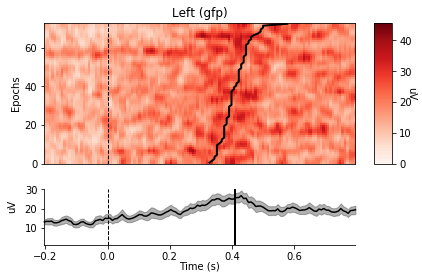

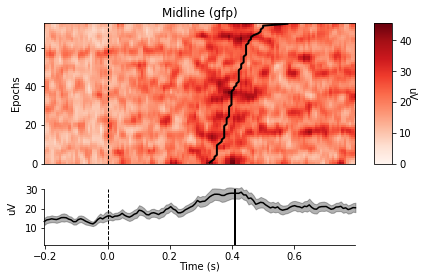

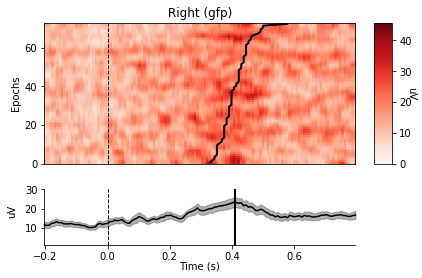

Loading data for 73 events and 129 original time points ...
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
73 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


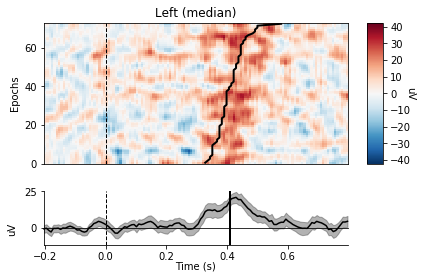

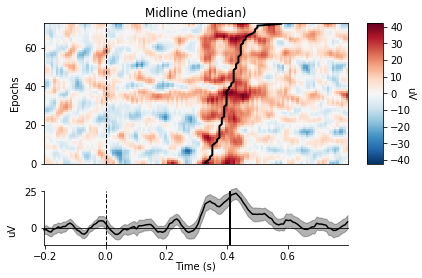

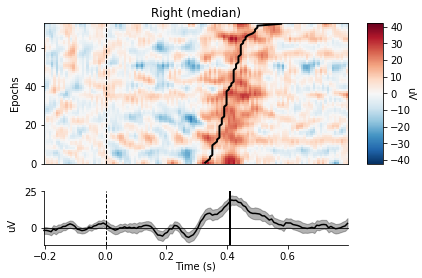

In [8]:
# Parameters for plotting
order = rts.argsort()  # sorting from fast to slow trials

rois = dict()
for pick, channel in enumerate(epochs.ch_names):
    last_char = channel[-1]  # for 10/20, last letter codes the hemisphere
    roi = ("Midline" if last_char in "z12" else
           ("Left" if int(last_char) % 2 else "Right"))
    rois[roi] = rois.get(roi, list()) + [pick]

# The actual plots
for combine_measures in ('gfp', 'median'):
    epochs.plot_image(group_by=rois, order=order, overlay_times=rts / 1000.,
                      sigma=1.5, combine=combine_measures,
                      ts_args=dict(vlines=[0, rts.mean() / 1000.]))